In [32]:
import random
import cv2
import numpy as np
import os

from matplotlib import pyplot as plt

import albumentations as A

In [33]:
def visualize(image):
    plt.figure(figsize=(2,2))
    plt.axis('off')
    plt.imshow(image)

In [34]:
# IMPORT IMAGE AND NORMALIZE
path = 'C:/Users/manue/Desktop/Student/Thesis/nuScenes_dataSet/patches/color_patches/Augmentation/'
image = cv2.imread(os.path.join(path, 'scene-0001.png'))
grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
grayscale = grayscale/255.

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image/255.

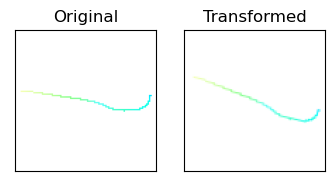

In [35]:
# ROTATION
transform = A.Rotate(limit=180, p=1.0, border_mode=cv2.BORDER_REPLICATE)
scene_name = "scene-{:04d}".format(1)

# LIMIT TO NO MORE THAN 10 ROTATIONs
num_rotations = 5
for i in range(num_rotations):
    augmented_image = transform(image=image)['image']
    # NAME OF THE AUGMENTED IMAGE
    scene_augmented = scene_name +'-'+str(i) + '.png'
    # DATA TO SAVE ARRAY
    # augmented_array = np.float32(255*augmented_image)
    augmented_array = np.float32(augmented_image)
    augmented_array = cv2.cvtColor(augmented_array, cv2.COLOR_RGB2BGR)
    cv2.imwrite(os.path.join(path, scene_augmented), augmented_array)
     
# augmented_image = np.float32(augmented_image)
# grayscale = cv2.cvtColor(augmented_image, cv2.COLOR_RGB2GRAY)

fig, ax = plt.subplots(1,2, figsize=(4, 2), sharex=True)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])

ax[0].imshow(image)
ax[0].title.set_text('Original')
ax[1].imshow(augmented_image)
ax[1].title.set_text('Transformed')

## Morphological transformations

In [36]:
# SPLITTING INTO CHANNELS
red = image[:,:,0]
green = image[:,:,1]
blue = image[:,:,2]

# MORPHOLOGICAL TRANSFORMATION
kernel = np.ones((5,5),np.uint8)
red_dilated = cv2.erode(red,kernel,iterations = 1)
green_dilated = cv2.erode(green,kernel,iterations = 1)
blue_dilated = cv2.erode(blue,kernel,iterations = 1)

new_image = np.dstack((red_dilated,green_dilated,blue_dilated))

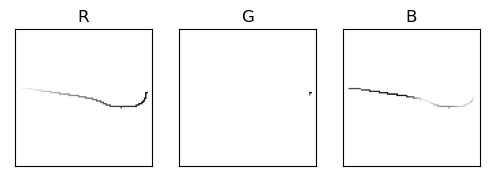

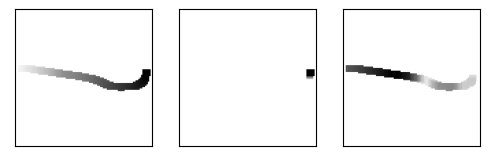

In [37]:
# PLOT FOR NORMAL CHANNELS
fig, ax = plt.subplots(1,3, figsize=(6, 2), sharex=True)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].set_xticks([])
ax[2].set_yticks([])

ax[0].imshow(red, cmap='gray')
ax[0].title.set_text('R')
ax[1].imshow(green, cmap='gray')
ax[1].title.set_text('G')
ax[2].imshow(blue, cmap='gray')
ax[2].title.set_text('B')

# PLOT FOR DILATION
fig, ax = plt.subplots(1,3, figsize=(6, 2), sharex=True)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].set_xticks([])
ax[2].set_yticks([])

ax[0].imshow(red_dilated, cmap='gray')
ax[1].imshow(green_dilated, cmap='gray')
ax[2].imshow(blue_dilated, cmap='gray')

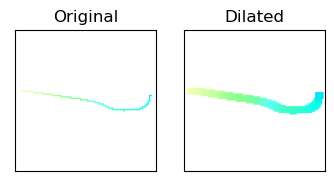

In [38]:
# COMPARISON: ORIGINAL VS DILATED
fig, ax = plt.subplots(1,2, figsize=(4, 2), sharex=True)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])

ax[0].imshow(image)
ax[0].title.set_text('Original')
ax[1].imshow(new_image)
ax[1].title.set_text('Dilated')

### Translations

In [46]:
h, w = grayscale.shape
offset = 3
tolerance = 5

# TOP EDGE
for t in range(h):
    row = grayscale[t].tolist()
    row.sort()
    if row[0] != 1:
        break

if t > tolerance:
    t = t - offset
print(t)
translated_top = image[t:, :, :]
additional_rows = np.ones((t, w, 3))
translation_top = np.concatenate((translated_top, additional_rows))

40


In [47]:
# BOTTOM EDGE
for b in range(h):
    row = grayscale[h-(b+1)].tolist()
    row.sort()
    if row[0] != 1:
        break
if b > tolerance:
    b = b - offset
print(b)

limit = h-b
translated_bot = image[:limit, :, :]
additional_rows = np.ones((b, w, 3))
translation_bot = np.concatenate((additional_rows,translated_bot))

39


In [48]:
# LEFT EDGE
for l in range(w):
    column = grayscale[:,l].tolist()
    column.sort()
    if column[0] != 1:
        break
if l > tolerance:
    l = l - offset
print(l)
translated_left = image[:,l:, :]
additional_columns = np.ones((h, l, 3))
translation_left = np.column_stack((translated_left, additional_columns))

4


In [49]:
# RIGHT EDGE 
for r in range(w):
    column = grayscale[:,w-(r+1)].tolist()
    column.sort()
    if column[0] != 1:
        break
if r > tolerance:
    r = r - offset
print(r)
limit = w - r
translated_right = image[:,:limit, :]
additional_columns = np.ones((h, r, 3))
translation_right = np.column_stack((additional_columns, translated_right))

3


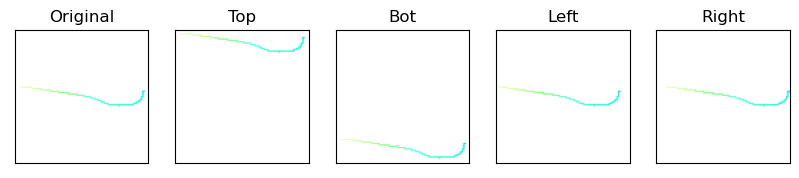

In [50]:
fig, ax = plt.subplots(1,5, figsize=(10, 2), sharex=True)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[3].set_xticks([])
ax[3].set_yticks([])
ax[4].set_xticks([])
ax[4].set_yticks([])

ax[0].imshow(image)
ax[0].title.set_text('Original')
ax[1].imshow(translation_top)
ax[1].title.set_text('Top')
ax[2].imshow(translation_bot)
ax[2].title.set_text('Bot')
ax[3].imshow(translation_left)
ax[3].title.set_text('Left')
ax[4].imshow(translation_right)
ax[4].title.set_text('Right')